### MTH 459/559 - ch 6 asset models

In [1]:
# ch6_asset_models.ipynb   <- everything after a '#' is a comment
import numpy as np # numpy is library for numerical & math calculations
import matplotlib.pyplot as plt # matplotlib is library for graphing 
import scipy.stats as sp # scipy.stats is library with prob/stat functions

**Outline:**  
I. use asset price model to generate "synthetic" stock price data  
II. show log of period returns, log(S(j+1)/S(j)), is a normal random variable  
III. show S(T) after 10 years is not a normal distribution but a lognormal distribution

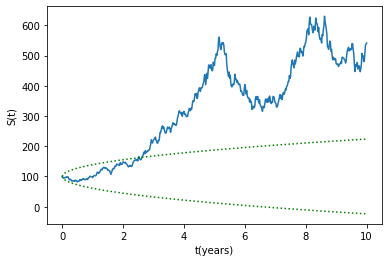

In [2]:
#I. use asset price model to generate "synthetic" stock price data
M = 520  # number of periods
dt = 1/52 # period length in years
T = M*dt # number of years
mu = 0.1  # drift mean 
sigma = 0.2 # volatility 
S0 = 100 # initial stock price
t=np.zeros(M+1) # initialize arrays for time (t) and stock price (S)
S=np.zeros(M+1)
t[0]=0;  # initial conditions for t, S
S[0]=S0;
for j in range(M):  # loop through every period
    t[j+1]=(j+1)*dt
    zj = sp.norm.rvs(0,1) # random variate from N(0,1)
    S[j+1]=S[j]*(1 + mu*dt + sigma*np.sqrt(dt)*zj)  # asset price model Eq. (6.2)
plt.plot(t,S)
plt.xlabel('t(years)')
plt.ylabel('S(t)')
# include 'rule of thumb' 95% confidence intervals valid for small t (p. 58)
upper = S0*(1 + 1.96*sigma*np.sqrt(t))  
lower = S0*(1 - 1.96*sigma*np.sqrt(t))
plt.plot(t,upper,'g:') 
plt.plot(t,lower,'g:')
plt.show()

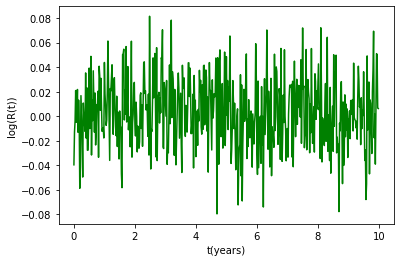

In [3]:
# II. show log of period returns, log(S(j+1)/S(j)), is a normal random variable
R = np.zeros(M) # create array of zeros of size N-1
for j in range(M):
    R[j] = S[j+1]/S[j]; # return R for one period 
plt.plot(t[:-1],np.log(R),'g-') # graph log(R)
plt.xlabel('t(years)')
plt.ylabel('log(R(t))')
plt.show()

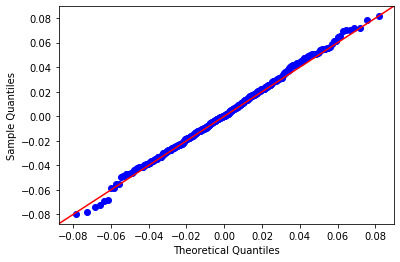

In [4]:
# quantile-quantile plot (qqplot) showing log(R) has a normal distribution
import statsmodels.api as sm # statsmodels needed for qq plot
nu = mu - 0.5*sigma**2  
nu_dt = nu*dt   
sigma_dt = sigma*np.sqrt(dt)
sm.qqplot(np.log(R), dist=sp.norm, loc=nu_dt, scale=sigma_dt, line = '45') 
plt.show() 

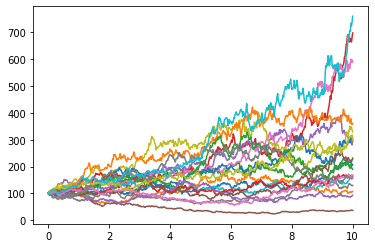

In [5]:
#III. show S(T) after T years is not a normal distribution but a lognormal distribution
Ntrial = 1000  # do Ntrial simulations of length T
Sfinal = np.zeros(Ntrial);  # initialize array of final prices for each simulation
for itrial in range(Ntrial):  # loop over every trial
    t[0]=0;                  # same code as used above for one simulation
    S[0] = S0;
    for j in range(M):
        t[j+1]=(j+1)*dt
        zj = sp.norm.rvs(0,1) # random variate from N(0,1)
        S[j+1]=S[j]*(1 + mu*dt + sigma*np.sqrt(dt)*zj)
    Sfinal[itrial]=S[M]  # at end of trial, save final price S(T) in Sfinal array
    # next 3 lines plot the S(t) vs t for the first 20 samples
    if itrial < 20:
        plt.plot(t,S)
plt.show()

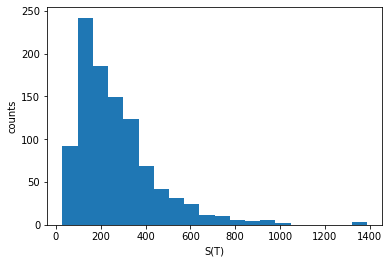

In [6]:
# histogram of S(T)
plt.hist(Sfinal, bins = 20) 
plt.xlabel('S(T)') 
plt.ylabel('counts')
plt.show()

The above histogram clearly shows that S(T) is not a normal distribution (in fact S(T) $\ge$ 0 inconsistent with normal distribution).  Claim log(S(T)/S0) is normal distribution with mean, stddev given below.

mean = nu_T =  0.8 ,  stddev = sigma_T =  0.632455532033676


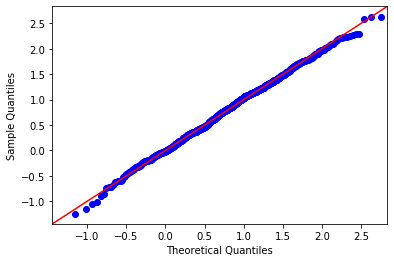

In [7]:
# qqplot showing log(S(T)/S0) is normal distribution
nu = mu - 0.5*sigma**2
nu_T = nu*T
sigma_T = sigma*np.sqrt(T)
qqpic = sm.qqplot(np.log(Sfinal/S0), dist=sp.norm, loc=nu_T, scale=sigma_T, line = '45') 
print('mean = nu_T = ',nu_T, ',  stddev = sigma_T = ', sigma_T)

[scipy.stats.lognorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) describes how to specify parameters for the lognormal distribution.  The main point is that three parameters are needed.  To specify the distribution for the asset price model, use   
`s = sigma*sqrt(T),  scale = S0*exp(nu*T),  loc = 0`



Ntrial =  1000


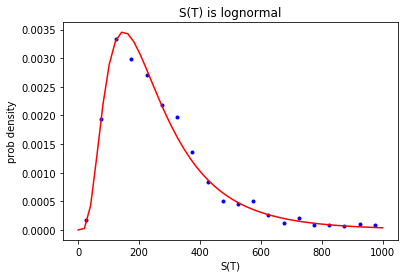

In [8]:
### verifying S(T) is lognormal using kernel density estimate
nbins = 20  # number of bins
b = 1000      # right end (from looking at histogram)
a = 0     # left end (from looking at histogram)
dx = (b-a)/nbins  # bin width
bin_edges = np.linspace(a,b,nbins+1) # nbins+1 points for nbins bins
# counts in each bin
counts, bin_edges = np.histogram(Sfinal,bins=bin_edges) 
print('Ntrial = ',Ntrial)
# find bin centers and kernel density
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2 
kernel_density = counts/(Ntrial*dx)
# plot of kernel density estimate and exact prob density
plt.plot(bin_centers,kernel_density,'b.')
xfine = np.linspace(a,b) # fine array in x for plotting exact curve
plt.plot(xfine,sp.lognorm.pdf(xfine,s=sigma_T,scale=S0*np.exp(nu_T)),'r-')
plt.title('S(T) is lognormal')
plt.xlabel('S(T)')
plt.ylabel('prob density')
plt.show()

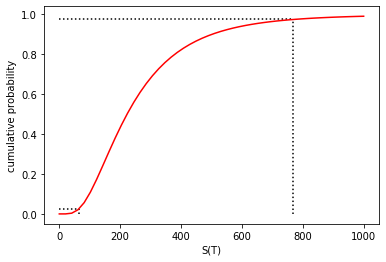

95% confidence interval
lower =  64.42858127034066 upper =  768.763230034869


In [9]:
# cdf of S(T) with 95% confidence intervals
plt.plot(xfine,sp.lognorm.cdf(xfine,s=sigma_T,scale=S0*np.exp(nu_T)),'r-')
plt.xlabel('S(T)')
plt.ylabel('cumulative probability')
# add in exact 95% confidence intervals
upper = S0*np.exp(nu_T + 1.96*sigma_T)
lower = S0*np.exp(nu_T - 1.96*sigma_T)
plt.vlines(upper, 0, 0.975,linestyles='dotted')
plt.hlines(0.975, 0, upper,linestyles='dotted')
plt.vlines(lower, 0, 0.025,linestyles='dotted')
plt.hlines(0.025, 0, lower,linestyles='dotted')
plt.show()
print('95% confidence interval')
print('lower = ',lower, 'upper = ',upper)